In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset = pd.read_csv('experimental_data.csv')

In [7]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,time,death_event
0,1,67.0,0,1,1,0,1,228.69,36.6,1,4,1
1,0,61.0,0,0,1,1,0,202.21,NaN,0,4,1
2,1,80.0,0,1,1,0,0,105.92,32.5,0,4,1
3,0,49.0,0,0,1,0,1,171.23,34.4,1,4,1
4,0,79.0,1,0,1,1,0,174.12,24.0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,45.0,0,0,1,1,1,113.63,27.5,1,270,0
296,0,66.0,0,0,1,0,0,141.24,28.5,0,271,0
297,1,58.0,1,0,1,1,0,56.96,26.8,1,278,0
298,1,69.0,0,0,1,1,0,203.04,33.6,0,147,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             300 non-null    int64  
 1   age                300 non-null    float64
 2   hypertension       300 non-null    int64  
 3   heart_disease      300 non-null    int64  
 4   ever_married       300 non-null    int64  
 5   work_type          300 non-null    int64  
 6   Residence_type     300 non-null    int64  
 7   avg_glucose_level  300 non-null    float64
 8   bmi                260 non-null    float64
 9   smoking_status     300 non-null    int64  
 10  time               300 non-null    int64  
 11  death_event        300 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [9]:
dataset.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status        0
time                  0
death_event           0
dtype: int64

In [10]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

In [11]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
time                 0
death_event          0
dtype: int64

In [12]:
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,time,death_event
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000
mean,0.406667,63.851067,0.240000,0.166667,0.853333,0.393333,0.536667,128.596333,30.176538,0.433333,78.173333,0.83000
std,0.492032,17.107385,0.427797,0.373301,0.354364,0.489306,0.499487,60.723048,6.498409,0.496364,77.956273,0.37626
min,0.000000,1.320000,0.000000,0.000000,0.000000,0.000000,0.000000,55.420000,16.000000,0.000000,4.000000,0.00000
25%,0.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,78.775000,26.575000,0.000000,14.000000,1.00000
50%,0.000000,68.000000,0.000000,0.000000,1.000000,0.000000,1.000000,103.555000,30.176538,0.000000,42.000000,1.00000
75%,1.000000,78.000000,0.000000,0.000000,1.000000,1.000000,1.000000,192.350000,32.350000,1.000000,147.000000,1.00000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,271.740000,60.900000,1.000000,278.000000,1.00000


In [13]:
dataset.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,time,death_event
gender,1.000000,0.069203,0.011440,0.157808,0.055499,-0.097057,0.007167,0.137962,0.010686,0.166156,-0.048405,0.103695
age,0.069203,1.000000,0.185869,0.217571,0.345428,0.031522,0.024384,0.195042,0.031654,0.046224,-0.328853,0.501610
hypertension,0.011440,0.185869,1.000000,0.020943,-0.031769,0.106730,-0.025669,0.089942,0.135281,0.028351,-0.027226,0.129654
heart_disease,0.157808,0.217571,0.020943,1.000000,0.008427,-0.030517,0.038863,0.244339,0.009111,0.132365,-0.134885,0.130962
ever_married,0.055499,0.345428,-0.031769,0.008427,1.000000,-0.090527,-0.101783,0.180868,0.158754,0.210424,-0.129830,0.188629
work_type,-0.097057,0.031522,0.106730,-0.030517,-0.090527,1.000000,0.009214,-0.073350,-0.131720,-0.084459,-0.012490,0.037422
Residence_type,0.007167,0.024384,-0.025669,0.038863,-0.101783,0.009214,1.000000,0.020364,0.011713,0.003148,-0.082964,0.024380
avg_glucose_level,0.137962,0.195042,0.089942,0.244339,0.180868,-0.073350,0.020364,1.000000,0.311741,0.011461,-0.229823,0.143916
bmi,0.010686,0.031654,0.135281,0.009111,0.158754,-0.131720,0.011713,0.311741,1.000000,0.045803,-0.058175,0.084263
smoking_status,0.166156,0.046224,0.028351,0.132365,0.210424,-0.084459,0.003148,0.011461,0.045803,1.000000,-0.003417,0.073422


<Axes: >

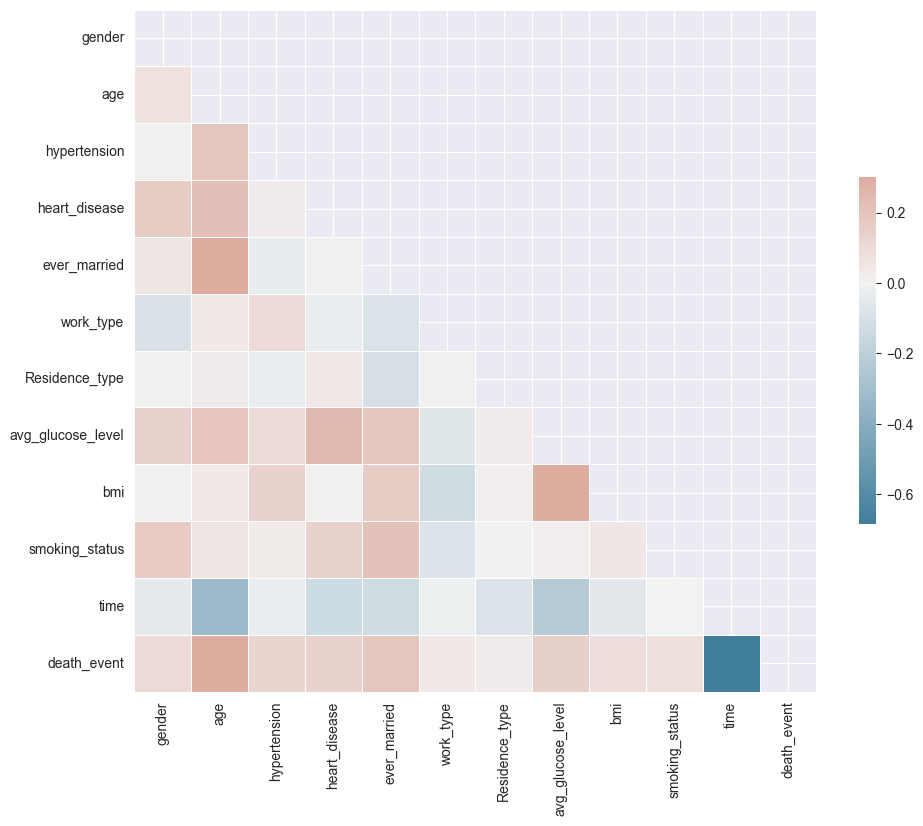

In [14]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

gender
0    178
1    122
Name: count, dtype: int64


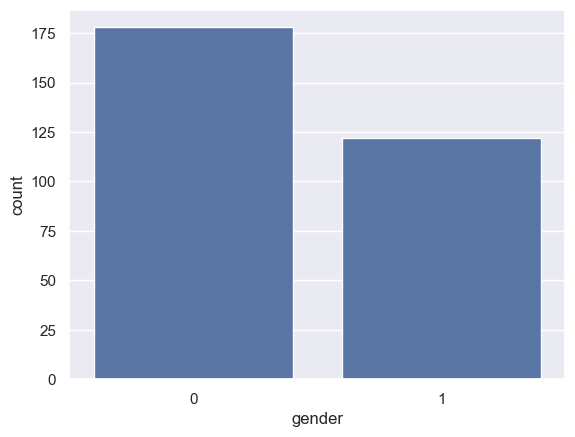

In [15]:
print(dataset.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender")
plt.show()

hypertension
0    228
1     72
Name: count, dtype: int64


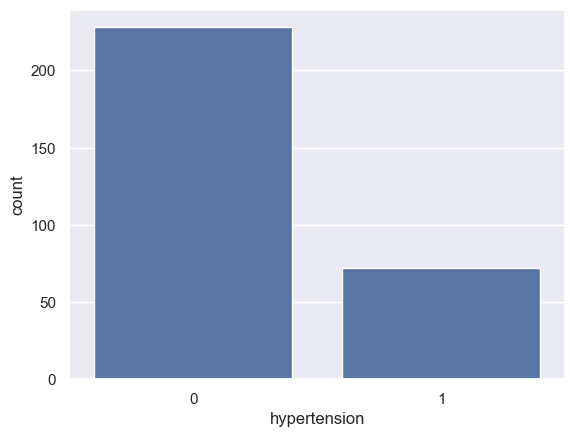

In [16]:
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

ever_married
1    256
0     44
Name: count, dtype: int64


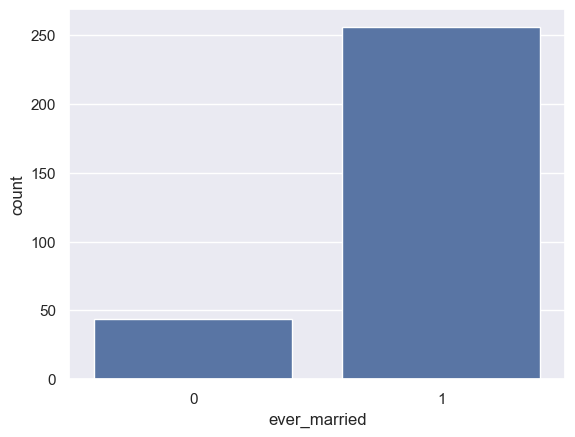

In [17]:
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

work_type
0    182
1    118
Name: count, dtype: int64


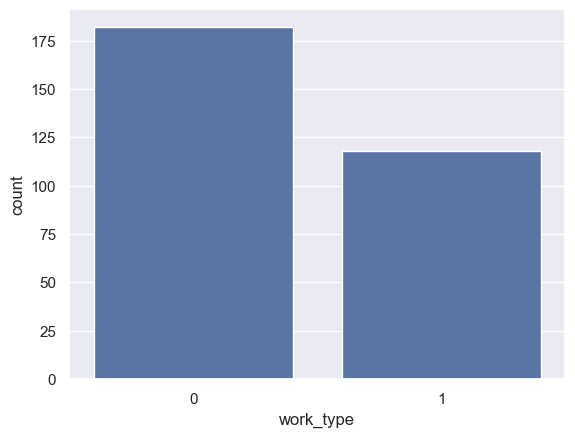

In [18]:
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

Residence_type
1    161
0    139
Name: count, dtype: int64


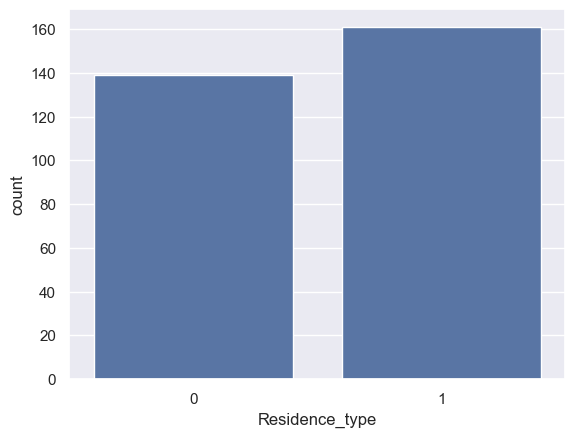

In [19]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

smoking_status
0    170
1    130
Name: count, dtype: int64


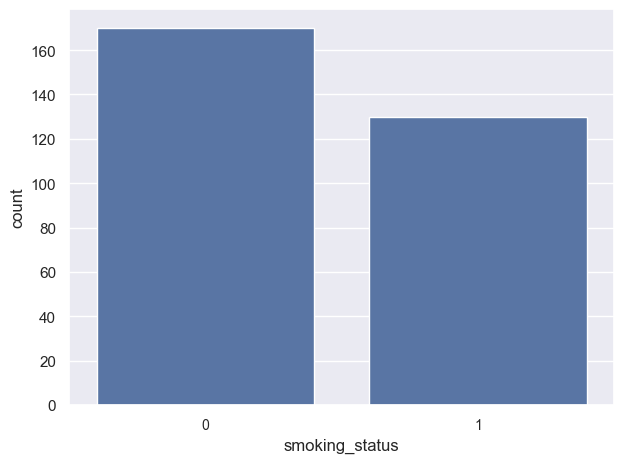

In [20]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

death_event
1    249
0     51
Name: count, dtype: int64


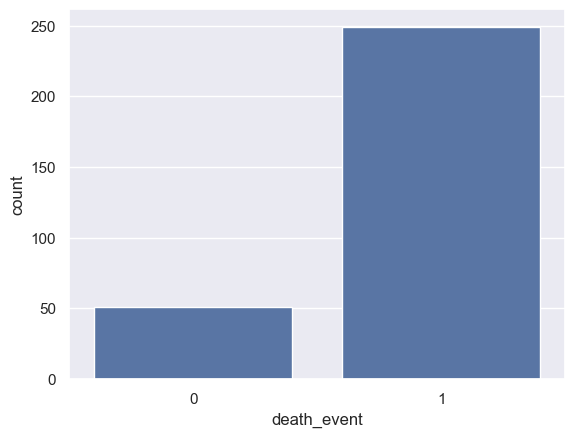

In [21]:
print(dataset.death_event.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="death_event")
plt.show()

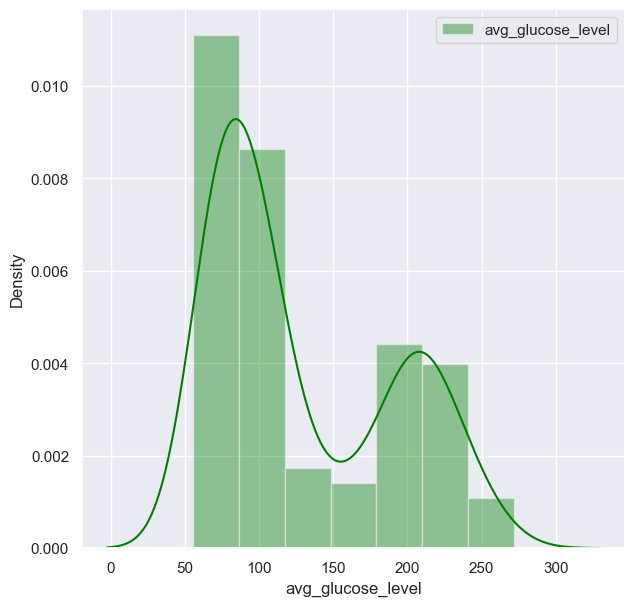

In [22]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

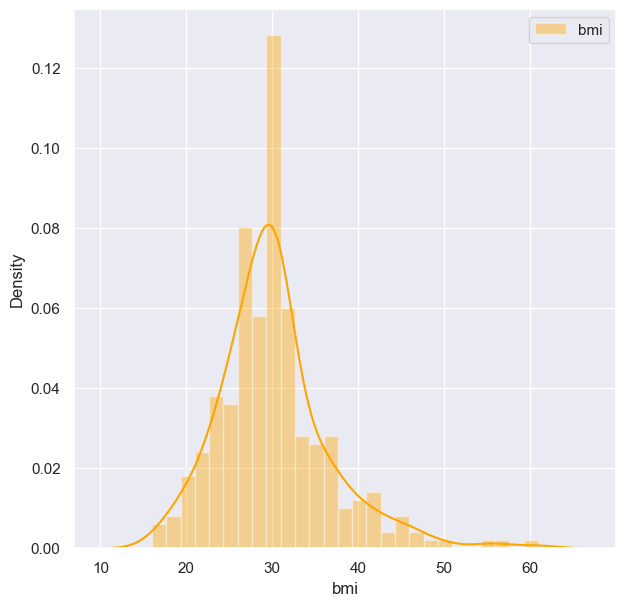

In [23]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

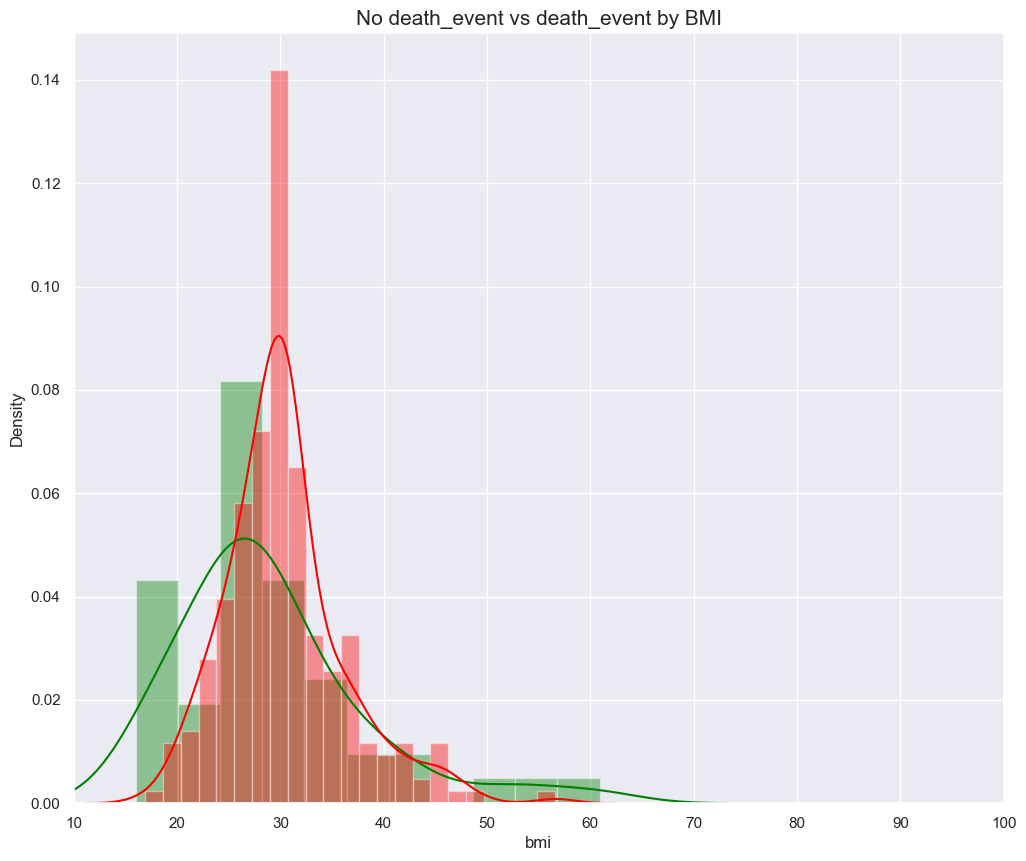

In [24]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['death_event'] == 0]["bmi"], color='green') # No death_event - green
sns.distplot(dataset[dataset['death_event'] == 1]["bmi"], color='red') # death_event - Red

plt.title('No death_event vs death_event by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

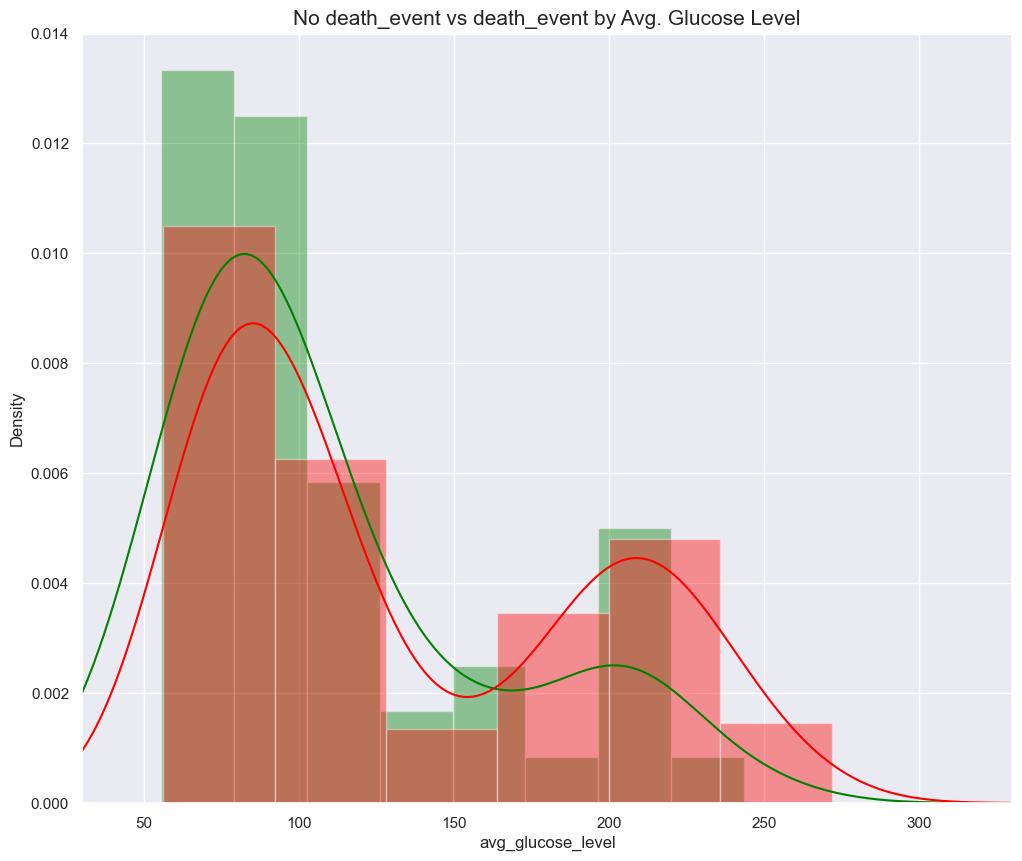

In [25]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['death_event'] == 0]["avg_glucose_level"], color='green') # No death_event - green
sns.distplot(dataset[dataset['death_event'] == 1]["avg_glucose_level"], color='red') # death_event - Red

plt.title('No death_event vs death_event by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

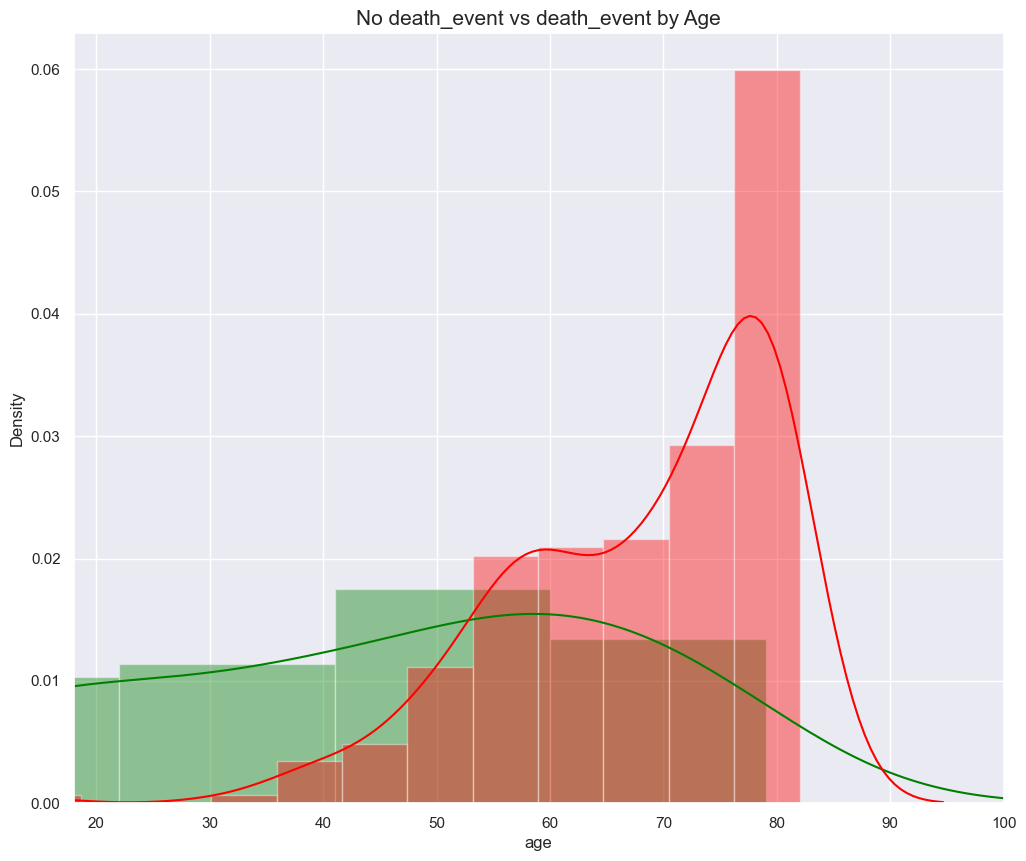

In [26]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['death_event'] == 0]["age"], color='green') # No death_event - green
sns.distplot(dataset[dataset['death_event'] == 1]["age"], color='red') # death_event - Red

plt.title('No death_event vs death_event by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

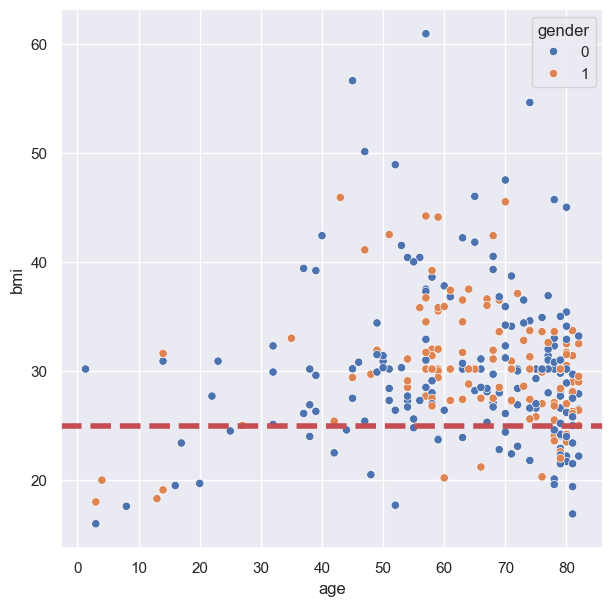

In [27]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

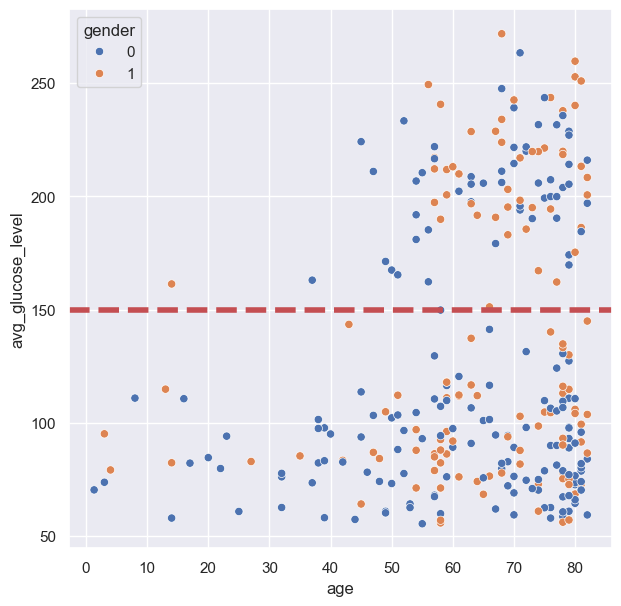

In [28]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

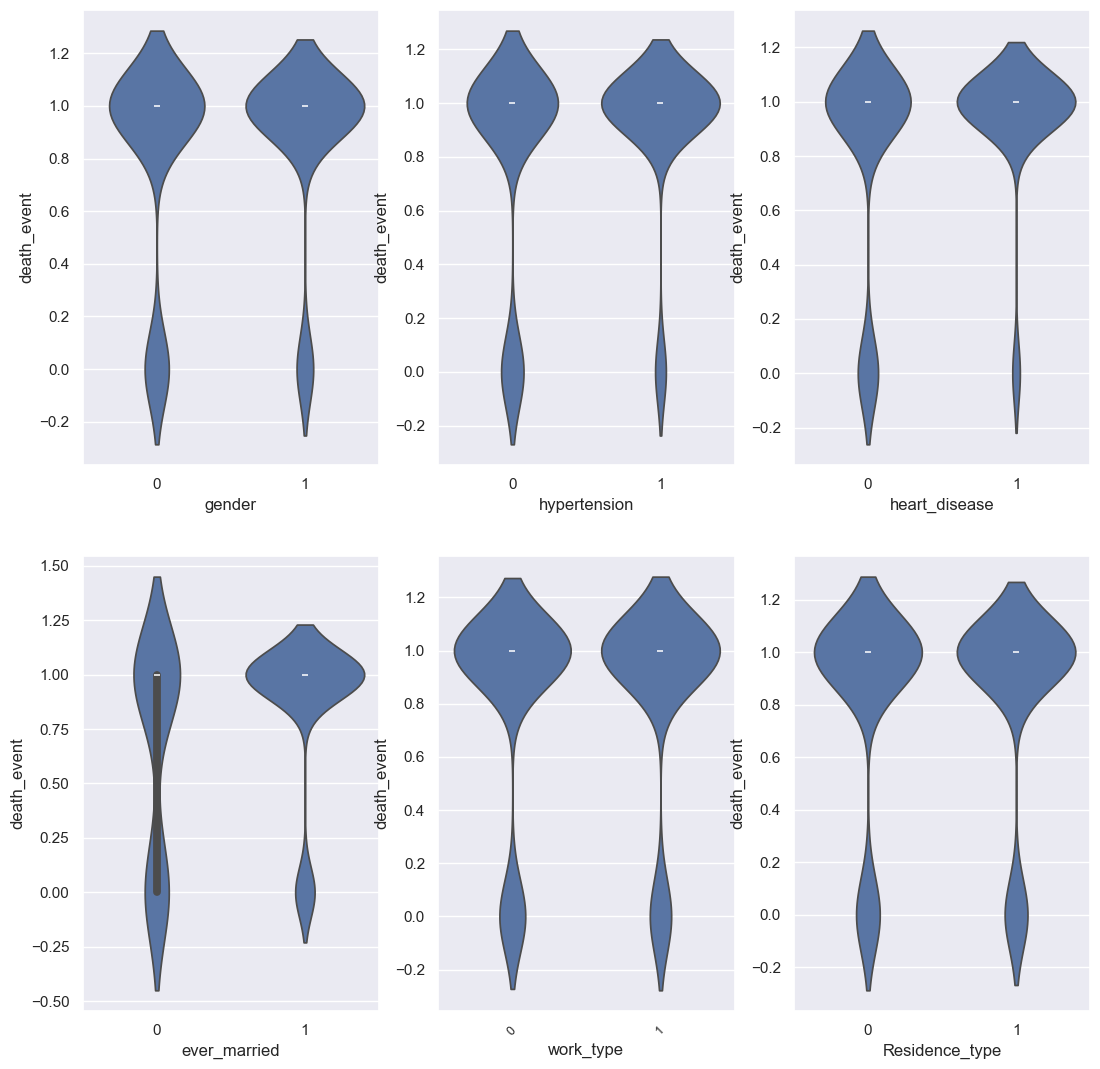

In [29]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'death_event', data = dataset)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'death_event', data = dataset)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'death_event', data = dataset)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'death_event', data = dataset)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'death_event', data = dataset)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'death_event', data = dataset)
plt.show()

<Figure size 1000x1000 with 0 Axes>

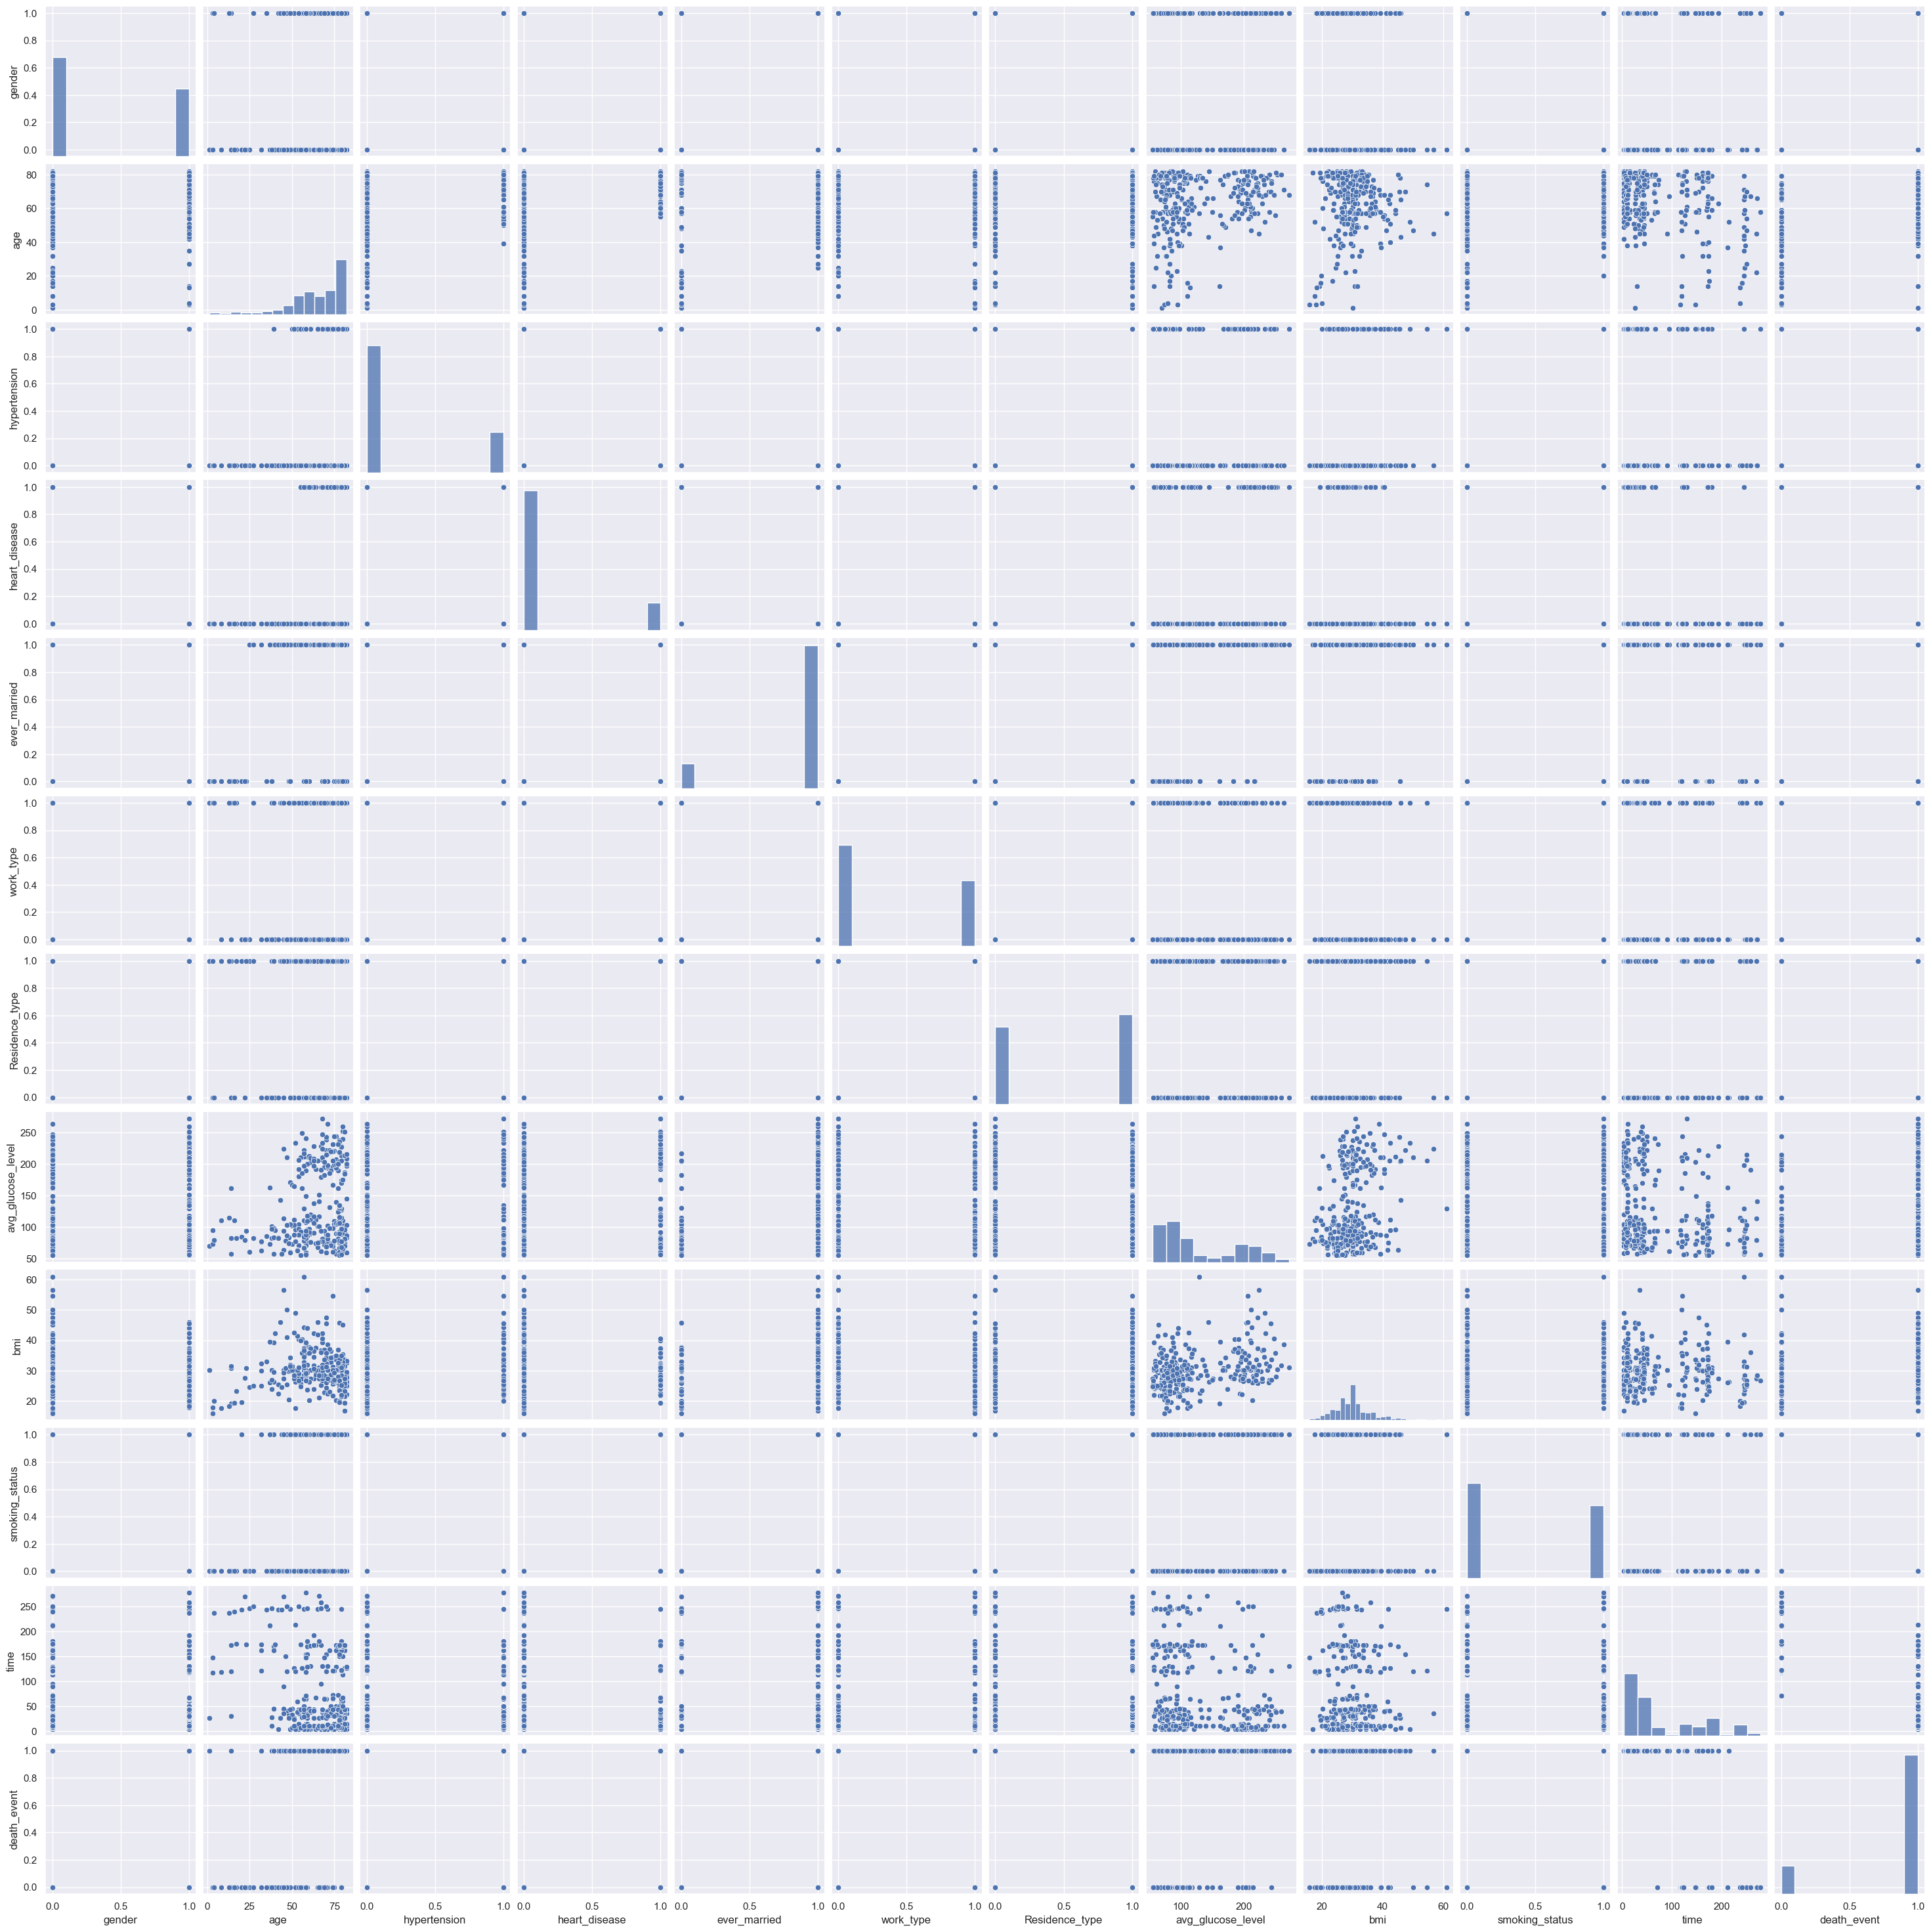

In [30]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset)
plt.show()

In [31]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [32]:
x

array([[ 67.        ,   0.        ,   1.        , ...,  36.6       ,
          1.        ,   4.        ],
       [ 61.        ,   0.        ,   0.        , ...,  30.17653846,
          0.        ,   4.        ],
       [ 80.        ,   0.        ,   1.        , ...,  32.5       ,
          0.        ,   4.        ],
       ...,
       [ 58.        ,   1.        ,   0.        , ...,  26.8       ,
          1.        , 278.        ],
       [ 69.        ,   0.        ,   0.        , ...,  33.6       ,
          0.        , 147.        ],
       [ 58.        ,   0.        ,   0.        , ...,  29.1       ,
          0.        ,  71.        ]])

In [33]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [34]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [35]:
x = dataset.drop(columns='death_event')
y = dataset['death_event']

# Split the data into training and testing sets (adjust the test_size parameter as needed)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set - Features:", x_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", x_test.shape, "Labels:", y_test.shape)

Training set - Features: (240, 11) Labels: (240,)
Testing set - Features: (60, 11) Labels: (60,)


In [36]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 198
Before OverSampling, counts of label '0': 42 

After OverSampling, the shape of train_X: (396, 11)
After OverSampling, the shape of train_y: (396,) 

After OverSampling, counts of label '1': 198
After OverSampling, counts of label '0': 198


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [40]:
!pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\Iuliuss\PycharmProjects\bd_part2\venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [42]:
import sklearn
print(sklearn.__version__)

1.3.2


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [44]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[ 7  2]
 [ 6 45]]
Accuracy Score:  0.8666666666666667

K-Fold Validation Mean Accuracy: 91.40 %

Standard Deviation: 5.56 %

ROC AUC Score: 0.83

Precision: 0.96

Recall: 0.88

F1: 0.92
-----------------------------------

SVM :
[[ 6  3]
 [ 6 45]]
Accuracy Score:  0.85

K-Fold Validation Mean Accuracy: 95.96 %

Standard Deviation: 3.76 %

ROC AUC Score: 0.77

Precision: 0.94

Recall: 0.88

F1: 0.91
-----------------------------------
KNeighbors :
[[ 6  3]
 [ 9 42]]
Accuracy Score:  0.8

K-Fold Validation Mean Accuracy: 92.91 %

Standard Deviation: 4.21 %

ROC AUC Score: 0.75

Precision: 0.93

Recall: 0.82

F1: 0.87
-----------------------------------

GaussianNB :
[[ 6  3]
 [ 6 45]]
Accuracy Score:  0.85

K-Fold Validation Mean Accuracy: 89.38 %

Standard Deviation: 6.69 %

ROC AUC Score: 0.77

Precision: 0.94

Recall: 0.88

F1: 0.91
-----------------------------------

BernoulliNB :
[[ 8  1]
 [ 6 45]]
Accuracy Score:  0.8833333333333333

K-Fold Validation Mean A

In [45]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [46]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [47]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
7,XGBoost,88.333333,96.980769,2.190104,0.885621,0.978261,0.882353,0.927835
5,Decision Tree,88.333333,93.698718,2.550130,0.748366,0.923077,0.941176,0.932039
4,BernoulliNB,88.333333,87.378205,5.034762,0.885621,0.978261,0.882353,0.927835
6,Random Forest,86.666667,98.237179,1.957649,0.784314,0.938776,0.901961,0.920000
0,Logistic Regreesion,86.666667,91.397436,5.558605,0.830065,0.957447,0.882353,0.918367
1,SVM,85.000000,95.955128,3.758450,0.774510,0.937500,0.882353,0.909091
3,GaussianNB,85.000000,89.378205,6.692569,0.774510,0.937500,0.882353,0.909091
2,KNeighbors,80.000000,92.910256,4.211709,0.745098,0.933333,0.823529,0.875000


In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [50]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 91.40%
Best Parameters :  {'C': 1, 'random_state': 0}

----------------
KNeighborsClassifier():
Best Accuracy : 94.42%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------
SVC():
Best Accuracy : 95.96%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 89.38%
Best Parameters :  {'var_smoothing': 1e-09}

----------------
BernoulliNB():
Best Accuracy : 87.38%
Best Parameters :  {'alpha': 0.25}

----------------

DecisionTreeClassifier():
Best Accuracy : 93.70%
Best Parameters :  {'criterion': 'gini', 'random_state': 0}

----------------
RandomForestClassifier():
Best Accuracy : 98.24%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 100, 'random_state': 0}

----------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stoppin

              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.94      0.90      0.92        51

    accuracy                           0.87        60
   macro avg       0.74      0.78      0.76        60
weighted avg       0.88      0.87      0.87        60

ROC AUC score: 0.9302832244008714
Accuracy Score:  0.8666666666666667


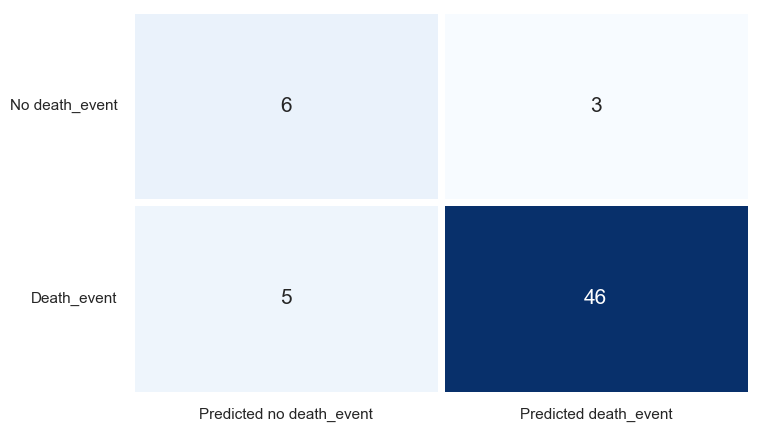

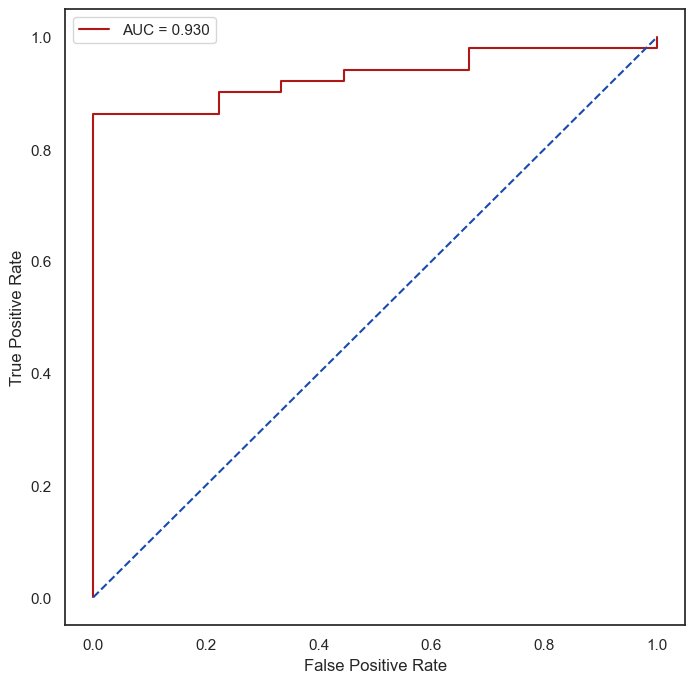

In [51]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No death_event', 'Death_event'], xticklabels = ['Predicted no death_event', 'Predicted death_event'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.98      0.88      0.93        51

    accuracy                           0.88        60
   macro avg       0.77      0.89      0.81        60
weighted avg       0.92      0.88      0.89        60

ROC AUC score: 0.9498910675381264
Accuracy Score:  0.8833333333333333


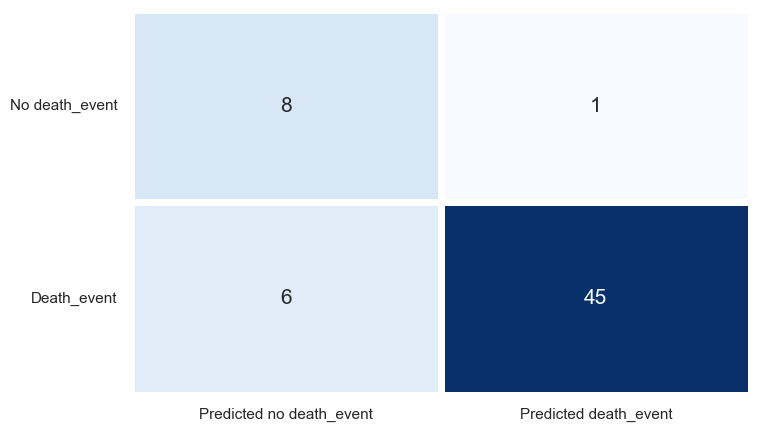

Text(0.5, 0, 'False Positive Rate')

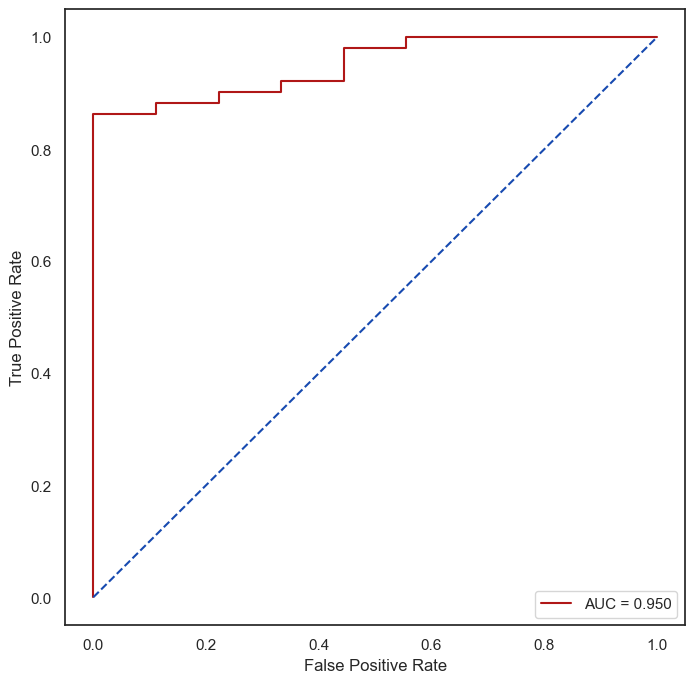

In [52]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No death_event', 'Death_event'], xticklabels = ['Predicted no death_event', 'Predicted death_event'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Building the function
def ann_classifier(hidden_layer_sizes=(8,), alpha=0.01, max_iter=50, solver='adam'):
    ann = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, max_iter=max_iter, solver=solver)
    return ann

# Create an MLPClassifier instance
ann = ann_classifier()

# Define the parameters for grid search
parameters = {'hidden_layer_sizes': [(8,), (16,), (8, 8)],
              'alpha': [0.01, 0.1, 1],
              'max_iter': [50, 100, 150],
              'solver': ['adam', 'sgd']}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ann, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x_train_res, y_train_res)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f} %".format(grid_search.best_score_ * 100))


Best Parameters:  {'alpha': 1, 'hidden_layer_sizes': (8, 8), 'max_iter': 150, 'solver': 'adam'}
Best Accuracy: 91.92 %


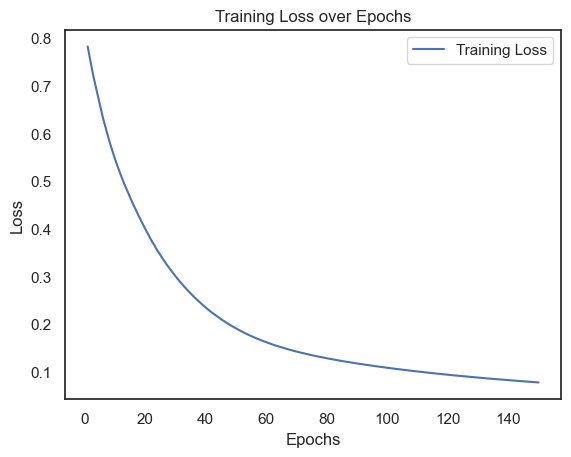

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Building the function
def ann_classifier(hidden_layer_sizes=(32,), alpha=0.01, max_iter=50, solver='adam'):
    ann = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, max_iter=max_iter, solver=solver)
    return ann

# Create an MLPClassifier instance
ann = ann_classifier()

# Define the parameters for grid search
parameters = {'hidden_layer_sizes': [(32,), (64,), (32, 32)],
              'alpha': [0.01, 0.1, 1],
              'max_iter': [50, 100, 150],
              'solver': ['adam', 'sgd']}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ann, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x_train_res, y_train_res)

# Get the best model from the grid search
best_ann = grid_search.best_estimator_

# Train the best model and keep track of the training history
ann_history = best_ann.fit(x_train_res, y_train_res)

# Access the training loss at each iteration (epoch)
epochs = np.arange(1, best_ann.n_iter_ + 1)
training_loss = best_ann.loss_curve_

# Plot the training loss over epochs
plt.plot(epochs, training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss over Epochs')
plt.show()


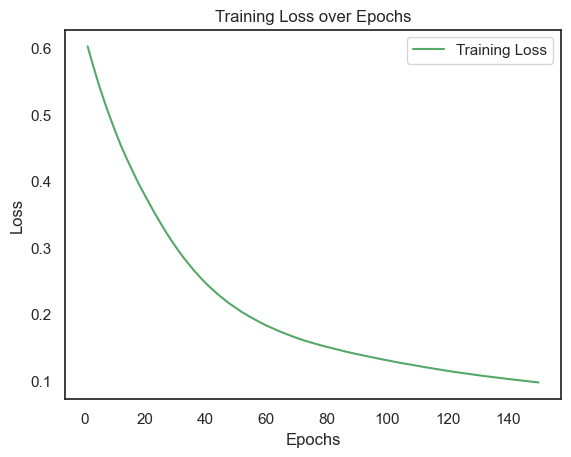

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Building the function
def ann_classifier(hidden_layer_sizes=(32,), alpha=0.01, max_iter=50, solver='adam'):
    ann = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, max_iter=max_iter, solver=solver)
    return ann

# Create an MLPClassifier instance
ann = ann_classifier()

# Define the parameters for grid search
parameters = {'hidden_layer_sizes': [(32,), (64,), (32, 32)],
              'alpha': [0.01, 0.1, 1],
              'max_iter': [50, 100, 150],
              'solver': ['adam', 'sgd']}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ann, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x_train_res, y_train_res)

# Get the best model from the grid search
best_ann = grid_search.best_estimator_

# Train the best model and keep track of the training history
ann_history = best_ann.fit(x_train_res, y_train_res)

# Access the training loss at each iteration (epoch)
epochs = np.arange(1, best_ann.n_iter_ + 1)
training_loss = best_ann.loss_curve_

# Plot the training loss over epochs
plt.plot(epochs, training_loss, 'g', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


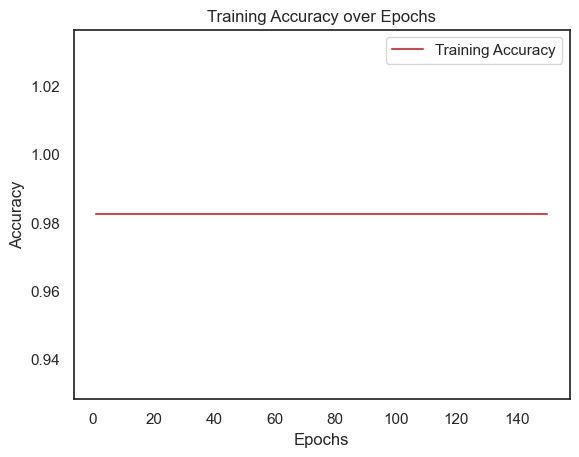

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Building the function
def ann_classifier(hidden_layer_sizes=(32,), alpha=0.01, max_iter=50, solver='adam'):
    ann = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, max_iter=max_iter, solver=solver)
    return ann

# Create an MLPClassifier instance
ann = ann_classifier()

# Define the parameters for grid search
parameters = {'hidden_layer_sizes': [(32,), (64,), (32, 32)],
              'alpha': [0.01, 0.1, 1],
              'max_iter': [50, 100, 150],
              'solver': ['adam', 'sgd']}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ann, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x_train_res, y_train_res)

# Get the best model from the grid search
best_ann = grid_search.best_estimator_

# Train the best model and keep track of the training history
ann_history = best_ann.fit(x_train_res, y_train_res)

# Access the training accuracy at each iteration (epoch)
epochs = np.arange(1, best_ann.n_iter_ + 1)
training_accuracy = [best_ann.score(x_train_res, y_train_res)] * len(epochs)

# Plot the training accuracy over epochs
plt.plot(epochs, training_accuracy, 'r', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

# Building the function
def ann_classifier(hidden_layer_sizes=(32,), alpha=0.01, max_iter=50, solver='adam'):
    ann = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, max_iter=max_iter, solver=solver)
    return ann

# Create an MLPClassifier instance
ann = ann_classifier()

# Training the model
ann.fit(x_train_res, y_train_res)

# Access the training accuracy at each iteration (epoch)
epochs = np.arange(1, ann.n_iter_ + 1)
training_accuracy = [ann.score(x_train_res, y_train_res)] * len(epochs)

# Plot the training accuracy over iterations
plt.plot(epochs, training_accuracy, 'r', label='Training Accuracy')
plt.title('Training Accuracy over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: name 'x_train_res' is not defined

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Building the function
def ann_classifier(hidden_layer_sizes=(32,), alpha=0.01, max_iter=50, solver='adam'):
    ann = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, max_iter=max_iter, solver=solver)
    return ann

# Create an MLPClassifier instance
ann = ann_classifier()

# Define the parameters for grid search
parameters = {'hidden_layer_sizes': [(32,), (64,), (32, 32)],
              'alpha': [0.01, 0.1, 1],
              'max_iter': [50, 100, 150],
              'solver': ['adam', 'sgd']}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ann, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x_train_res, y_train_res)

# Get the best model from the grid search
best_ann = grid_search.best_estimator_

# Train the best model
y_pred = best_ann.predict(x_test)  # assuming x_test is your test data

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


NameError: name 'x_train_res' is not defined

In [72]:
from sklearn.metrics import accuracy_score

# Assuming you already have the confusion matrix 'conf_matrix'
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.85


Best Hyperparameters:
{'alpha': 0.01, 'hidden_layer_sizes': (32, 32), 'max_iter': 100, 'solver': 'adam'}

Test Set Accuracy: 85.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.92      0.90      0.91        51

    accuracy                           0.85        60
   macro avg       0.71      0.73      0.72        60
weighted avg       0.86      0.85      0.85        60


Confusion Matrix:
[[ 5  4]
 [ 5 46]]


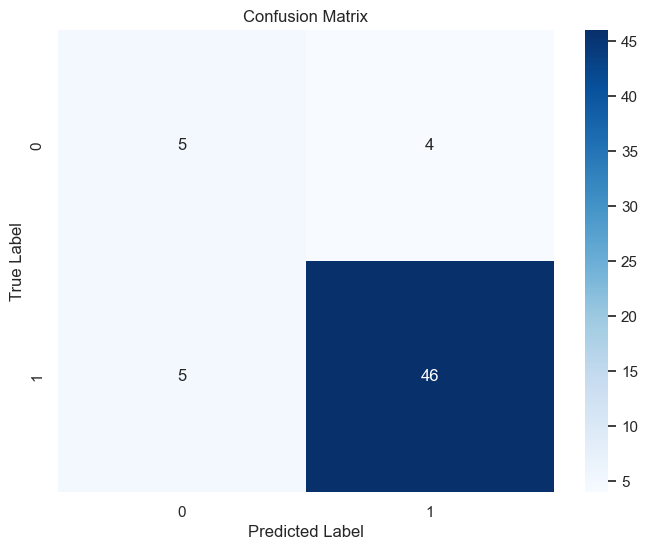

In [73]:
from sklearn.metrics import classification_report

# Print the best hyperparameters from the grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Train the best model on the entire training data
final_model = grid_search.best_estimator_
final_model.fit(x_train_res, y_train_res)

# Evaluate the model on the test set
y_pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("\nTest Set Accuracy: {:.2%}".format(accuracy))

# Display other classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


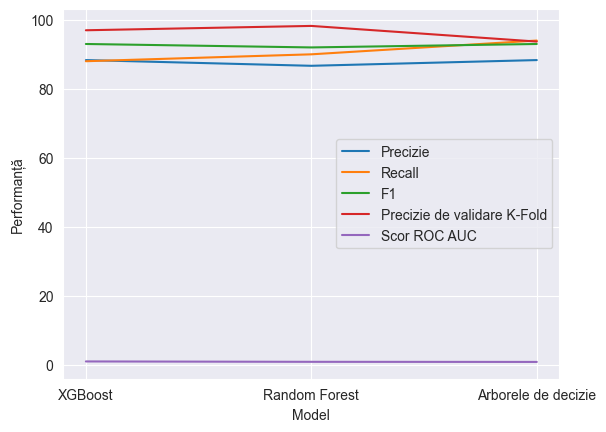

In [1]:
import matplotlib.pyplot as plt

# Definiți datele
modele = ["XGBoost", "Random Forest", "Arborele de decizie"]
precizie = [88.33, 86.67, 88.33]
recall = [88, 90, 94]
f1 = [93, 92, 93]
val_precizie = [96.98, 98.24, 93.70]
auc = [0.89, 0.78, 0.75]

# Creați plotul
plt.plot(modele, precizie, label="Precizie")
plt.plot(modele, recall, label="Recall")
plt.plot(modele, f1, label="F1")
plt.plot(modele, val_precizie, label="Precizie de validare K-Fold")
plt.plot(modele, auc, label="Scor ROC AUC")
plt.xlabel("Model")
plt.ylabel("Performanță")
plt.legend()

# Afișați plotul
plt.show()


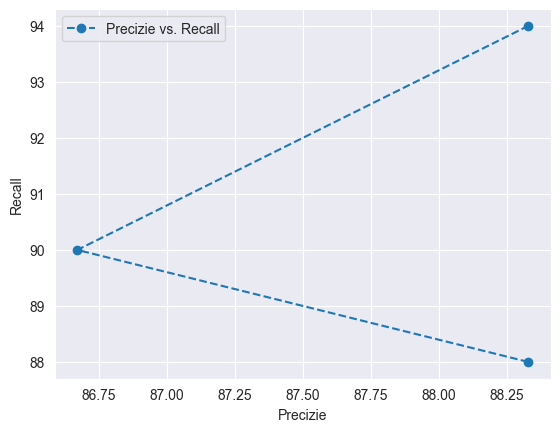

In [2]:
import matplotlib.pyplot as plt

# Definiți datele
modele = ["XGBoost", "Random Forest", "Arborele de decizie"]
precizie = [88.33, 86.67, 88.33]
recall = [88, 90, 94]

# Creați plotul
plt.plot(precizie, recall, marker="o", linestyle="dashed", label="Precizie vs. Recall")
plt.xlabel("Precizie")
plt.ylabel("Recall")
plt.legend()

# Afișați plotul
plt.show()


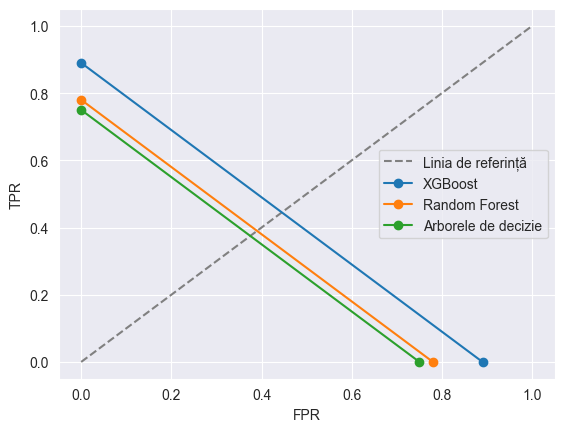

In [3]:
import matplotlib.pyplot as plt

# Definiți datele
modele = ["XGBoost", "Random Forest", "Arborele de decizie"]
auc = [0.89, 0.78, 0.75]

# Creați plotul
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Linia de referință")
for model, auc in zip(modele, auc):
    plt.plot([0, auc], [auc, 0], marker="o", label=model)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

# Afișați plotul
plt.show()


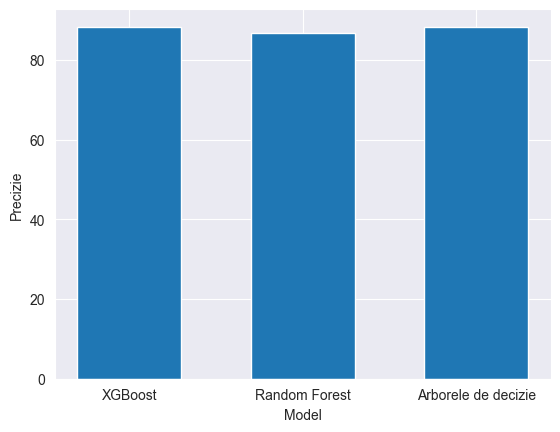

In [4]:
import matplotlib.pyplot as plt

# Definiți datele
modele = ["XGBoost", "Random Forest", "Arborele de decizie"]
precizie = [88.33, 86.67, 88.33]

# Creați plotul
plt.bar(modele, precizie, width=0.6)
plt.xlabel("Model")
plt.ylabel("Precizie")

# Afișați plotul
plt.show()


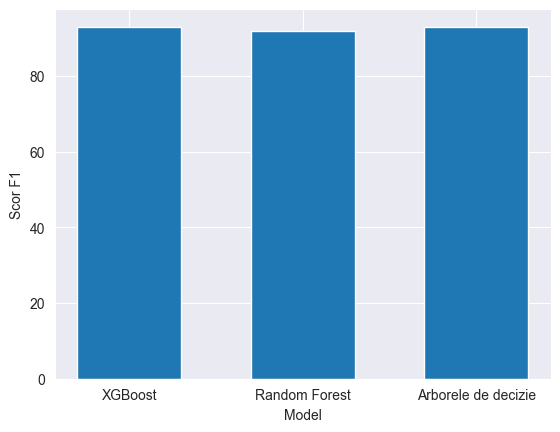

In [5]:
import matplotlib.pyplot as plt

# Definiți datele
modele = ["XGBoost", "Random Forest", "Arborele de decizie"]
f1 = [93, 92, 93]

# Creați plotul
plt.bar(modele, f1, width=0.6)
plt.xlabel("Model")
plt.ylabel("Scor F1")

# Afișați plotul
plt.show()


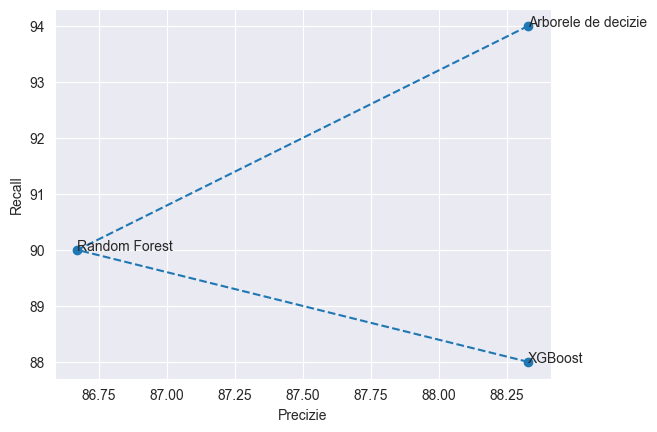

In [6]:
import matplotlib.pyplot as plt

# Definiți datele
modele = ["XGBoost", "Random Forest", "Arborele de decizie"]
precizie = [88.33, 86.67, 88.33]
recall = [88, 90, 94]

# Creați plotul
plt.plot(precizie, recall, marker="o", linestyle="dashed", label="Precizie vs. Recall")
for model, precizie, recall in zip(modele, precizie, recall):
    plt.annotate(model, (precizie, recall))
plt.xlabel("Precizie")
plt.ylabel("Recall")

# Afișați plotul
plt.show()


In [8]:
import matplotlib.pyplot as plt

# Sample data for Model 1 and Model 2
model_1_precision = 0.85
model_1_f1 = 0.90
model_2_precision = 0.87
model_2_f1 = 0.88

# Model names
model_names = ["Model 1", "Model 2"]


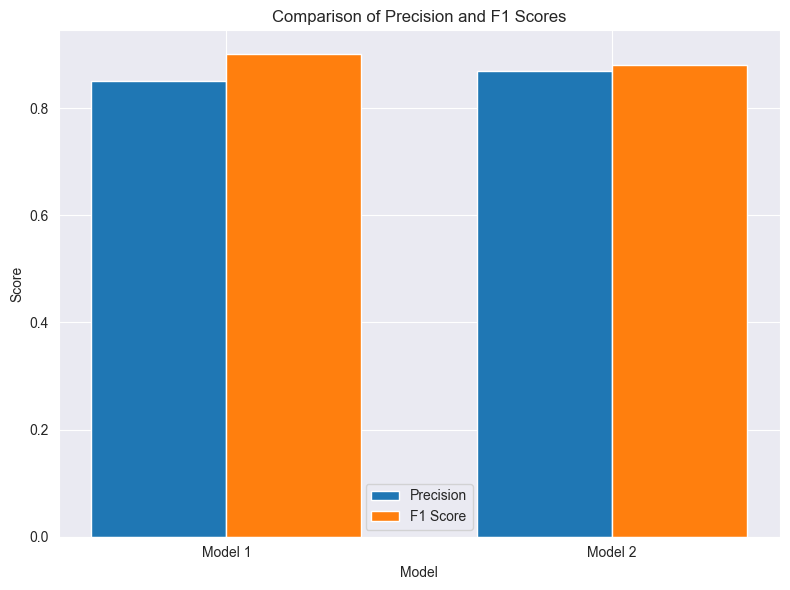

In [9]:
# Create a bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35

index = range(len(model_names))

plt.bar(index, [model_1_precision, model_2_precision], bar_width, label='Precision')
plt.bar([i + bar_width for i in index], [model_1_f1, model_2_f1], bar_width, label='F1 Score')

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Precision and F1 Scores")
plt.xticks([i + bar_width / 2 for i in index], model_names)
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
import matplotlib.pyplot as plt

# Data
models = ["XGBoost", "Random Forest", "Decision Tree"]
precision = [88.33, 86.67, 88.33]
f1_score = [93, 92, 93]

# Create the plot
plt.figure(figsize=(8, 6))
x_positions_precision = models
x_positions_f1 = [m + 0.4 for m in models]
plt.bar(x_positions_precision, precision, label='Precision', width=0.4, align='center')
plt.bar(x_positions_f1, f1_score, label='F1 Score', width=0.4, align='center')


plt.xlabel('Models')
plt.ylabel('Score (%)')
plt.title('Precision and F1 Score Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


TypeError: can only concatenate str (not "float") to str

<Figure size 800x600 with 0 Axes>

In [16]:
import pandas as pd

# Create DataFrame
data = {
    "Stage": ["Before OverSampling", "Before OverSampling", "After OverSampling", "After OverSampling", "After OverSampling", "After OverSampling"],
    "Label": ["Label '1'", "Label '0'", "train_x shape", "train_y shape", "Label '1'", "Label '0'"],
    "Count": [198, 42, (396, 11), (396, ), 198, 198]
}

df = pd.DataFrame(data)

# Display DataFrame
print(df.to_string())


                 Stage          Label      Count
0  Before OverSampling      Label '1'        198
1  Before OverSampling      Label '0'         42
2   After OverSampling  train_x shape  (396, 11)
3   After OverSampling  train_y shape     (396,)
4   After OverSampling      Label '1'        198
5   After OverSampling      Label '0'        198


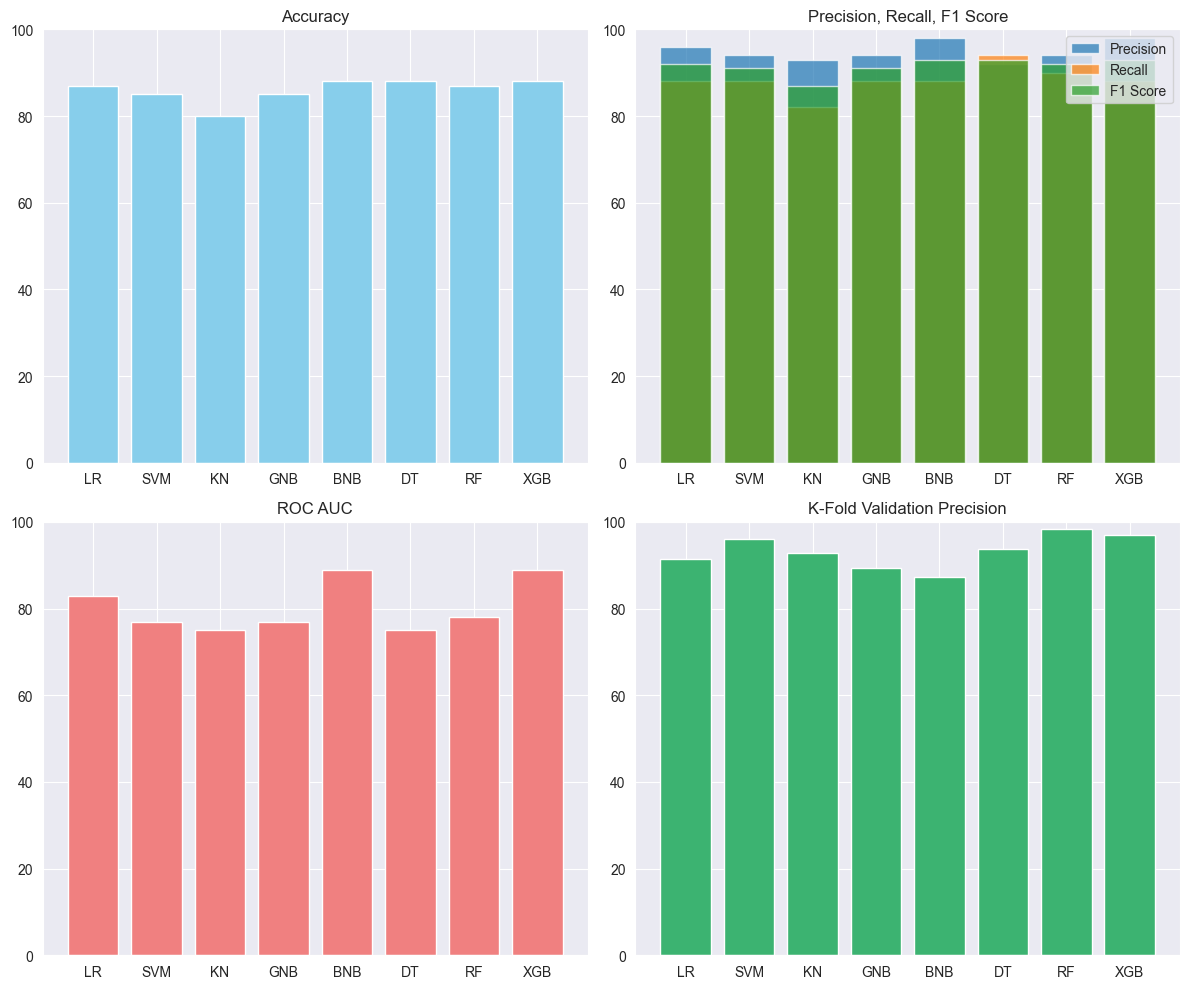

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LR', 'SVM', 'KN', 'GNB', 'BNB', 'DT', 'RF', 'XGB']
accuracy = [87, 85, 80, 85, 88, 88, 87, 88]
precision = [96, 94, 93, 94, 98, 92, 94, 98]
recall = [88, 88, 82, 88, 88, 94, 90, 88]
f1_score = [92, 91, 87, 91, 93, 93, 92, 93]
roc_auc = [83, 77, 75, 77, 89, 75, 78, 89]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
axs[0, 0].bar(models, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([0, 100])

# Precision, Recall, F1 Score
axs[0, 1].bar(models, precision, label='Precision', alpha=0.7)
axs[0, 1].bar(models, recall, label='Recall', alpha=0.7)
axs[0, 1].bar(models, f1_score, label='F1 Score', alpha=0.7)
axs[0, 1].set_title('Precision, Recall, F1 Score')
axs[0, 1].legend()
axs[0, 1].set_ylim([0, 100])

# ROC AUC
axs[1, 0].bar(models, roc_auc, color='lightcoral')
axs[1, 0].set_title('ROC AUC')
axs[1, 0].set_ylim([0, 100])

# K-Fold Validation Precision
kf_precision = [91.4, 95.96, 92.91, 89.38, 87.38, 93.7, 98.24, 96.98]
axs[1, 1].bar(models, kf_precision, color='mediumseagreen')
axs[1, 1].set_title('K-Fold Validation Precision')
axs[1, 1].set_ylim([0, 100])

# Adjust layout
plt.tight_layout()
plt.show()


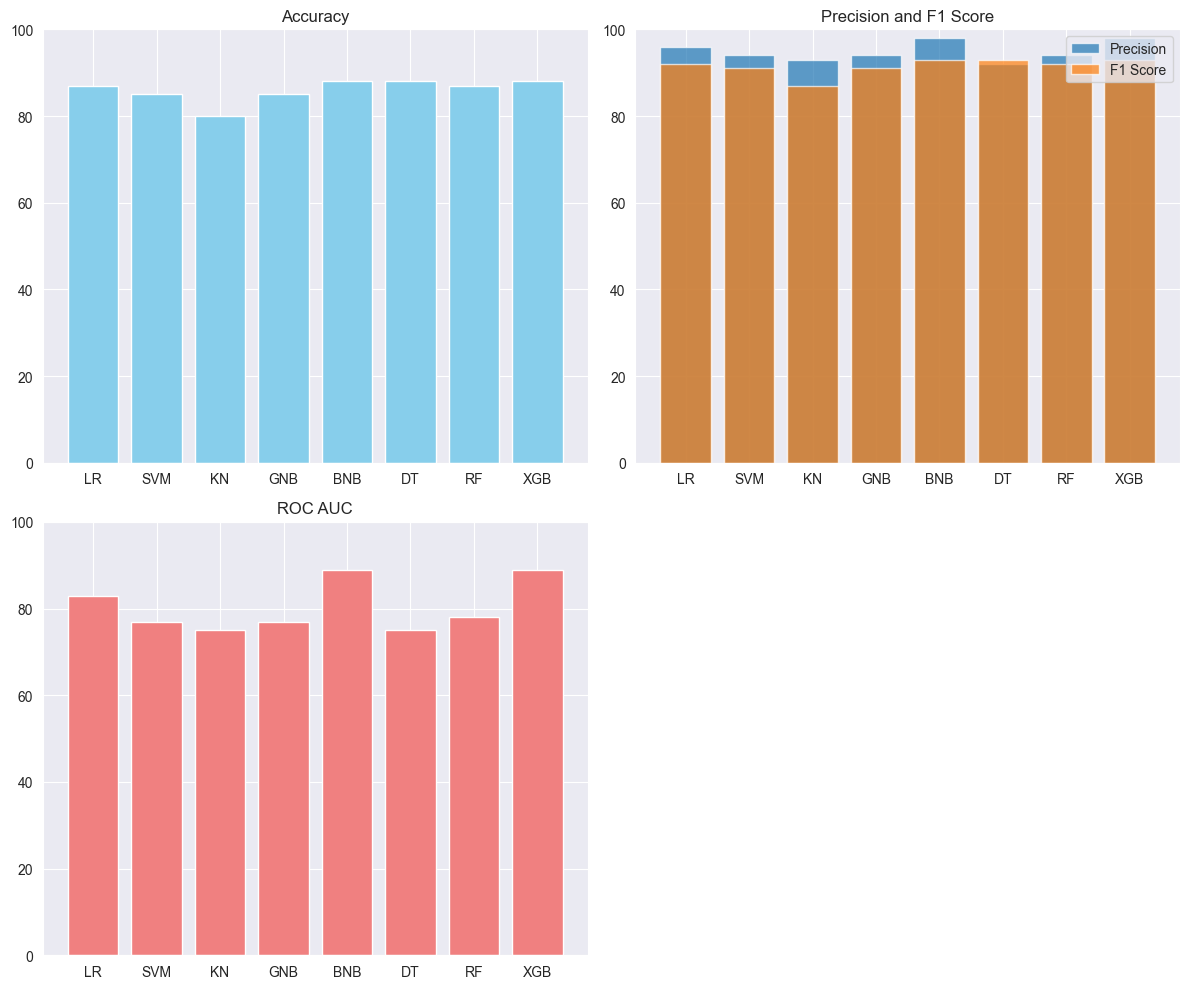

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LR', 'SVM', 'KN', 'GNB', 'BNB', 'DT', 'RF', 'XGB']
accuracy = [87, 85, 80, 85, 88, 88, 87, 88]
precision = [96, 94, 93, 94, 98, 92, 94, 98]
f1_score = [92, 91, 87, 91, 93, 93, 92, 93]
roc_auc = [83, 77, 75, 77, 89, 75, 78, 89]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
axs[0, 0].bar(models, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([0, 100])

# Precision, Recall, F1 Score
axs[0, 1].bar(models, precision, label='Precision', alpha=0.7)
axs[0, 1].bar(models, f1_score, label='F1 Score', alpha=0.7)
axs[0, 1].set_title('Precision and F1 Score')
axs[0, 1].legend()
axs[0, 1].set_ylim([0, 100])

# ROC AUC
axs[1, 0].bar(models, roc_auc, color='lightcoral')
axs[1, 0].set_title('ROC AUC')
axs[1, 0].set_ylim([0, 100])

# K-Fold Validation Precision
axs[1, 1].axis('off')  # Turn off this subplot

# Adjust layout
plt.tight_layout()
plt.show()


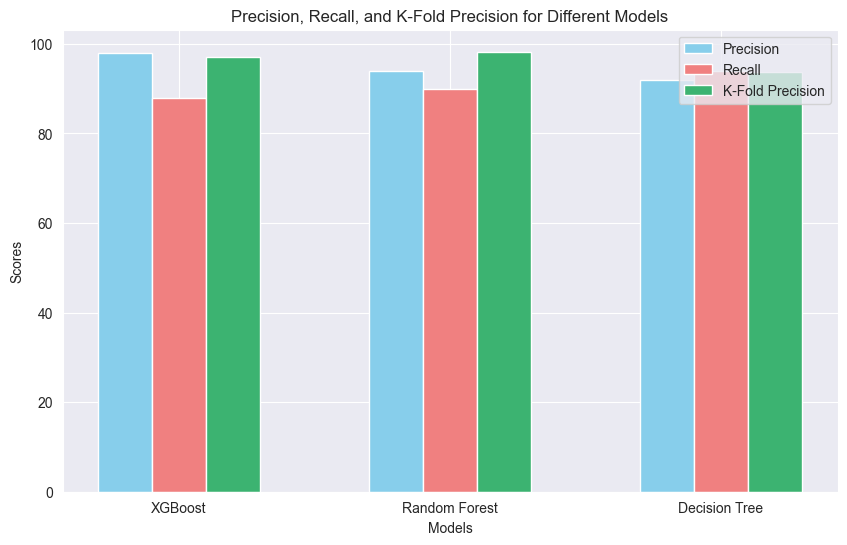

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['XGBoost', 'Random Forest', 'Decision Tree']
precision = [98, 94, 92]
recall = [88, 90, 94]
kf_precision = [96.98, 98.24, 93.70]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models))

bar1 = ax.bar(index, precision, bar_width, label='Precision', color='skyblue')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='lightcoral')
bar3 = ax.bar(index + 2 * bar_width, kf_precision, bar_width, label='K-Fold Precision', color='mediumseagreen')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and K-Fold Precision for Different Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.show()
